## Ridge and Lasso Regression¶


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# -*- coding: utf-8 -*-
import os
import os.path
from requests import session
import logging
import sys
from pathlib import Path
    #project_dir =os.getcwd().resolve().parent.parent
    
raw_data_path = os.path.abspath(os.path.join(os.getcwd(), os.pardir,'data','AQI'))
print(raw_data_path)

C:\Users\Admin\python-journey-begins\Air Quality Index Prediction\data\AQI


In [3]:
train_csv = os.path.join(raw_data_path, 'Real_Combine.csv')
train_csv

'C:\\Users\\Admin\\python-journey-begins\\Air Quality Index Prediction\\data\\AQI\\Real_Combine.csv'

In [4]:
df=pd.read_csv(train_csv)

In [5]:
df.head()

,T,TM,Tm,SLP,H,VV,V,VM,PM 2.5
0,7.4,9.8,4.8,1017.6,93,0.5,4.3,9.4,219.720833
1,7.8,12.7,4.4,1018.5,87,0.6,4.4,11.1,182.187500
2,6.7,13.4,2.4,1019.4,82,0.6,4.8,11.1,154.037500
3,8.6,15.5,3.3,1018.7,72,0.8,8.1,20.6,223.208333
4,12.4,20.9,4.4,1017.3,61,1.3,8.7,22.2,200.645833


In [6]:
df=df.dropna()

In [7]:
X=df.iloc[:,:-1] ## independent features
y=df.iloc[:,-1] ## dependent features

### Train Test split¶


In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

### Comparison Linear, Ridge and Lasso Regression¶


## Linear Regression¶


In [9]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

In [10]:

lin_regressor=LinearRegression()
mse=cross_val_score(lin_regressor,X,y,scoring='neg_mean_squared_error',cv=5)
mean_mse=np.mean(mse)
print(mean_mse)

-3686.2017774187807


## Ridge Regression¶


In [11]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

In [12]:
ridge=Ridge()
parameters={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40]}
ridge_regressor=GridSearchCV(ridge,parameters,scoring='neg_mean_squared_error',cv=5)
ridge_regressor.fit(X,y)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 5, 10,
                                   20, 30, 35, 40]},
             scoring='neg_mean_squared_error')

In [13]:

print(ridge_regressor.best_params_)
print(ridge_regressor.best_score_)

{'alpha': 40}
-3664.3648996834454


## Lasso Regression¶


In [14]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

In [15]:
lasso=Lasso()
parameters={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40]}
lasso_regressor=GridSearchCV(lasso,parameters,scoring='neg_mean_squared_error',cv=5)

lasso_regressor.fit(X,y)
print(lasso_regressor.best_params_)
print(lasso_regressor.best_score_)

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1444149.1786869352, tolerance: 614.5592033653883
  model = cd_fast.enet_coordinate_descent(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1568739.8267254874, tolerance: 678.971063907256
  model = cd_fast.enet_coordinate_descent(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1456481.2232268609, tolerance: 626.8737580907466
  model = cd_fast.enet_coordinate_descent(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarn

{'alpha': 1}
-3666.7832535148445


## Model Evaluation¶


In [16]:
prediction=lasso_regressor.predict(X_test)


C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='PM 2.5', ylabel='Density'>

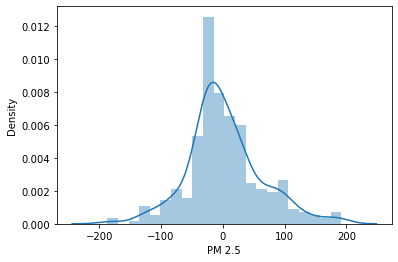

In [17]:
sns.distplot(y_test-prediction)


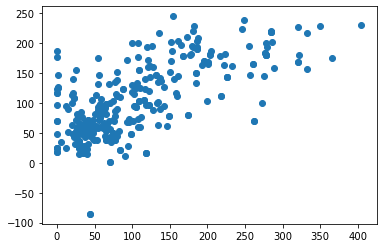

In [18]:
plt.scatter(y_test,prediction)


## Regression Evaluation Metrics¶


In [19]:
from sklearn import metrics


In [20]:
print('MAE:', metrics.mean_absolute_error(y_test, prediction))
print('MSE:', metrics.mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

MAE: 44.50831198865653
MSE: 3627.8109391612775
RMSE: 60.23131194952736


In [21]:
import pickle


In [22]:
# open a file, where you ant to store the data
file = open('lasso_regression_model.pkl', 'wb')

# dump information to that file
pickle.dump(lasso_regressor, file)